<a href="https://colab.research.google.com/github/Noman-494/Deep_learning/blob/main/Image_Classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


(50000, 32, 32, 3)

In [3]:
len(X_train[0])

32

In [4]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [5]:
def plot_sample(X_train,y_train,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X_train[index])
    plt.xlabel(classes[y_train[index]])

In [6]:
y_train=y_train.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

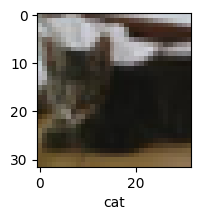

In [7]:
plot_sample(X_train,y_train,9)

In [8]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [9]:
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])
ann.compile(optimizer='SGD',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])
ann.fit(X_train,y_train,epochs=10)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.3047 - loss: 1.9295
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.4157 - loss: 1.6471
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.4540 - loss: 1.5466
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4821 - loss: 1.4774
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4965 - loss: 1.4323
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5102 - loss: 1.3896
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5281 - loss: 1.3508
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5355 - loss: 1.3191
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5537 - loss: 1.2758
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5635 - loss: 1.2513


In [10]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.63      0.53      0.57      1000
           1       0.50      0.81      0.62      1000
           2       0.52      0.24      0.32      1000
           3       0.32      0.41      0.36      1000
           4       0.45      0.40      0.42      1000
           5       0.52      0.29      0.37      1000
           6       0.37      0.81      0.51      1000
           7       0.78      0.39      0.52      1000
           8       0.61      0.67      0.64      1000
           9       0.66      0.38      0.48      1000

    accuracy                           0.49     10000
   macro avg       0.54      0.49      0.48     10000
weighted avg       0.54      0.49      0.48     10000



In [11]:
cnn=models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
cnn.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.3808 - loss: 1.6915
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5854 - loss: 1.1802
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6468 - loss: 1.0117
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6832 - loss: 0.9134
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7056 - loss: 0.8417
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7310 - loss: 0.7828
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7404 - loss: 0.7490
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7596 - loss: 0.6956
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7667 - loss: 0.6692
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7759 - loss: 0.6358


In [13]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6875 - loss: 0.9450


[0.9389352798461914, 0.6934000253677368]

In [14]:
cnn.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[3.09130337e-05, 9.48859361e-06, 3.77094164e-03, ...,
        8.26379983e-04, 1.00228665e-02, 2.01711169e-04],
       [5.28644174e-02, 5.13576642e-02, 6.90541783e-05, ...,
        1.45769616e-06, 8.82133901e-01, 1.35431541e-02],
       [3.85719314e-02, 3.61487150e-01, 7.42902001e-03, ...,
        7.35478185e-04, 5.42118669e-01, 2.05280166e-02],
       ...,
       [6.98604636e-05, 2.89483193e-08, 3.04504186e-02, ...,
        8.42816755e-02, 1.31765308e-04, 9.24309552e-06],
       [3.00550339e-04, 1.69961531e-05, 6.82238257e-04, ...,
        1.02368336e-04, 1.14386893e-07, 6.23880624e-06],
       [3.29595641e-05, 4.45215363e-07, 4.18391370e-04, ...,
        9.59529936e-01, 8.02648538e-06, 5.71909425e-07]], dtype=float32)

In [17]:
y_predict_sample05=cnn.predict(X_test)[0:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [18]:
argmax_y_predict_sample05=np.argmax(y_predict_sample05,axis=1)

In [19]:
argmax_y_predict_sample05

array([3, 8, 8, 8, 6])

In [20]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 1, 8, 8, 4]

In [22]:
y_test = y_test.reshape(-1,)

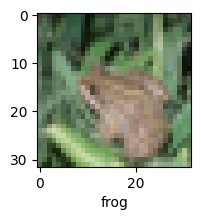

In [29]:
plot_sample(X_test,y_test,4)

In [30]:
classes[y_classes[4]]

'deer'